# Model Training with Artificial Neural Network

## Import Dependency

In [22]:
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import SGD

import sys
import os
sys.path.append(os.path.abspath('../..'))
from utils.BatchableDataset import BatchableDataset

## Import Dataset

In [3]:
train_dataset = BatchableDataset('../../datasets/processed/train_data.pt')
test_dataset = BatchableDataset('../../datasets/processed/test_data.pt')

c:\Users\LENOVO\Documents\wiwie\projects\ai-hand-writting-digit-classifier\utils\BatchableDataset.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.image, self.target

## Initialize Neural Network

In [ ]:
class DigitClassifierNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(8**2, 64)
        self.layer_2 = nn.Linear(64, 10)
        self.ReLU = nn.ReLU()
        
    def forward(self, x):
        x = x.reshape(-1, 8**2)
        x = self.ReLU(self.layer_1(x))
        x = self.layer_2(x)
        return x.squeeze()
    
digit_classifier_NN = DigitClassifierNN()

## Train Neural Network

In [6]:
train_data_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [16]:
def train_neural_network(data_loader, neural_network, n_epochs=20):
    optimizer = SGD(neural_network.parameters(), lr=0.5)
    loss_function = nn.CrossEntropyLoss()

    losses = []
    epochs = []
    for epoch in range(n_epochs):
        # print(f'Epoch {epoch}')
        N = len(data_loader)
        
        for i, (images, labels) in enumerate(data_loader):   
            outputs = neural_network(images)
            loss_value = loss_function(outputs, labels)
            
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            epochs.append(epoch + i / N)
            losses.append(loss_value.item())
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, n_epochs, loss_value.item()))
            
    return np.array(epochs), np.array(losses)

In [17]:
epoch_data, loss_data = train_neural_network(train_data_loader, digit_classifier_NN, n_epochs=60)

Epoch [1/60], Loss: 0.0073
Epoch [1/60], Loss: 0.0010
Epoch [1/60], Loss: 0.0086
Epoch [1/60], Loss: 0.0038
Epoch [1/60], Loss: 0.0064
Epoch [1/60], Loss: 0.0513
Epoch [1/60], Loss: 0.0017
Epoch [1/60], Loss: 0.0004
Epoch [1/60], Loss: 0.0076
Epoch [1/60], Loss: 0.0003
Epoch [1/60], Loss: 0.0037
Epoch [1/60], Loss: 0.0031
Epoch [1/60], Loss: 0.0033
Epoch [1/60], Loss: 0.0123
Epoch [1/60], Loss: 0.0061
Epoch [1/60], Loss: 0.0002
Epoch [1/60], Loss: 0.0206
Epoch [1/60], Loss: 0.0015
Epoch [1/60], Loss: 0.0186
Epoch [1/60], Loss: 0.0392
Epoch [1/60], Loss: 0.2387
Epoch [1/60], Loss: 0.0181
Epoch [1/60], Loss: 0.1534
Epoch [1/60], Loss: 0.0034
Epoch [1/60], Loss: 0.0586
Epoch [1/60], Loss: 0.0589
Epoch [1/60], Loss: 0.1498
Epoch [1/60], Loss: 0.0220
Epoch [1/60], Loss: 0.0671
Epoch [1/60], Loss: 0.7776
Epoch [1/60], Loss: 0.2829
Epoch [1/60], Loss: 0.0041
Epoch [1/60], Loss: 0.0133
Epoch [1/60], Loss: 0.3211
Epoch [1/60], Loss: 0.0469
Epoch [1/60], Loss: 0.0010
Epoch [1/60], Loss: 0.0027
E

Text(0.5, 1.0, 'Cross Entropy (per batch)')

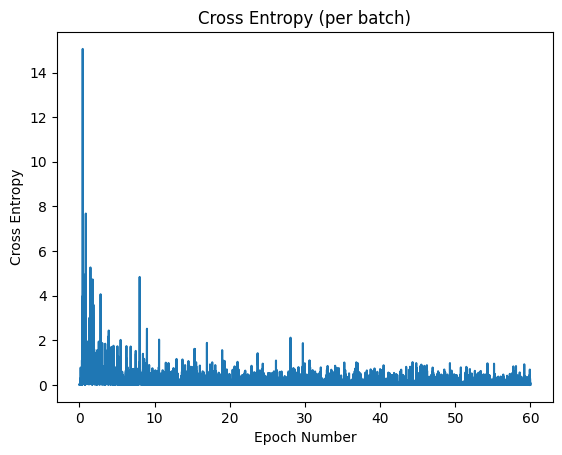

In [18]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

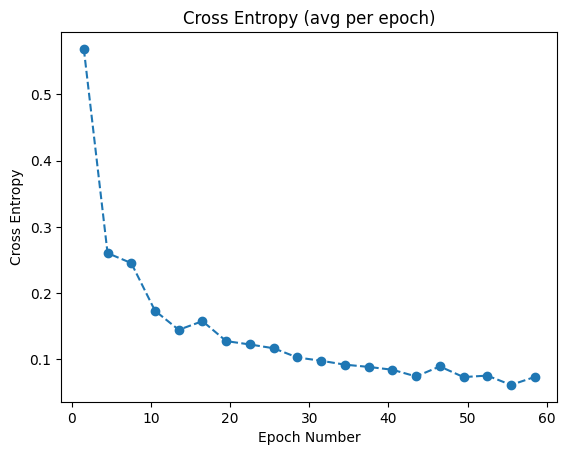

In [ ]:
epoch_data_avg = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avg = loss_data.reshape(20,-1).mean(axis=1)

plt.plot(epoch_data_avg, loss_data_avg, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avg per epoch)')
plt.savefig('../../visualization/cross_entropy.png')
plt.show()

## Evaluate Neural Network

In [23]:
def accuracy(outputs, labels):
    labels = torch.argmax(labels, dim=1)
    _, predictions = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

loss_function = nn.CrossEntropyLoss()

with torch.no_grad():
    sum_acc = 0
    for images, labels in test_data_loader:
        outputs = digit_classifier_NN(images)
        loss = loss_function(outputs, labels)
        acc = accuracy(outputs, labels)
        sum_acc += acc
    
    print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(loss.item(), sum_acc/len(test_data_loader)))

Test loss: 0.3009, Test accuracy: 0.9583


## Visualize Predicted Results

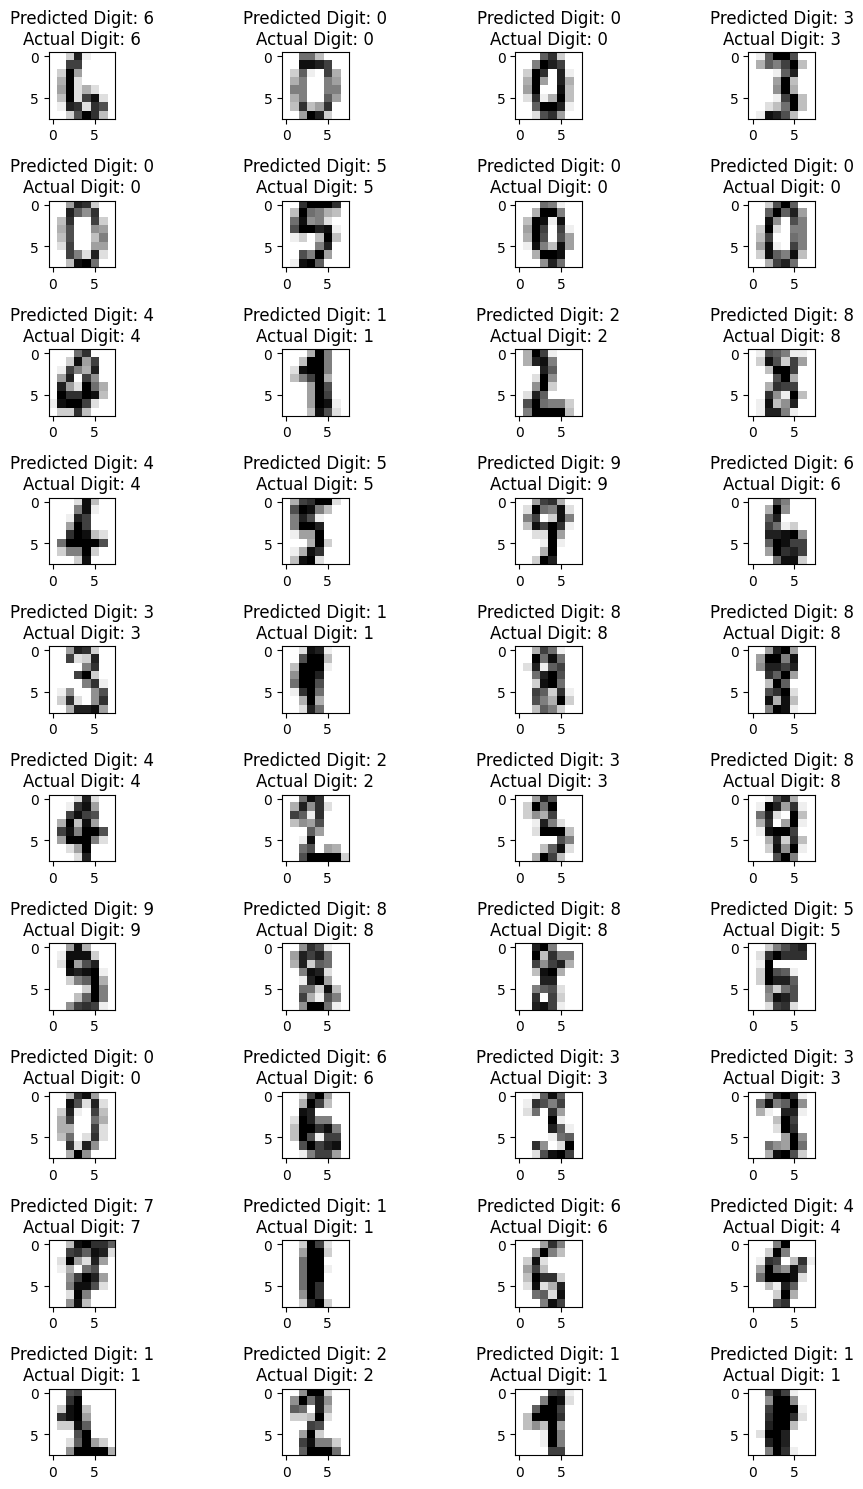

In [24]:
images, one_hot_labels = train_dataset[0:40]
actual_labels = one_hot_labels.argmax(axis=1)
predicted_labels = digit_classifier_NN(images).argmax(axis=1)

fig, ax = plt.subplots(10, 4, figsize=(10, 15))

for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(images[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Predicted Digit: {predicted_labels[i]}\nActual Digit: {actual_labels[i]}')
    
fig.tight_layout()
plt.show()

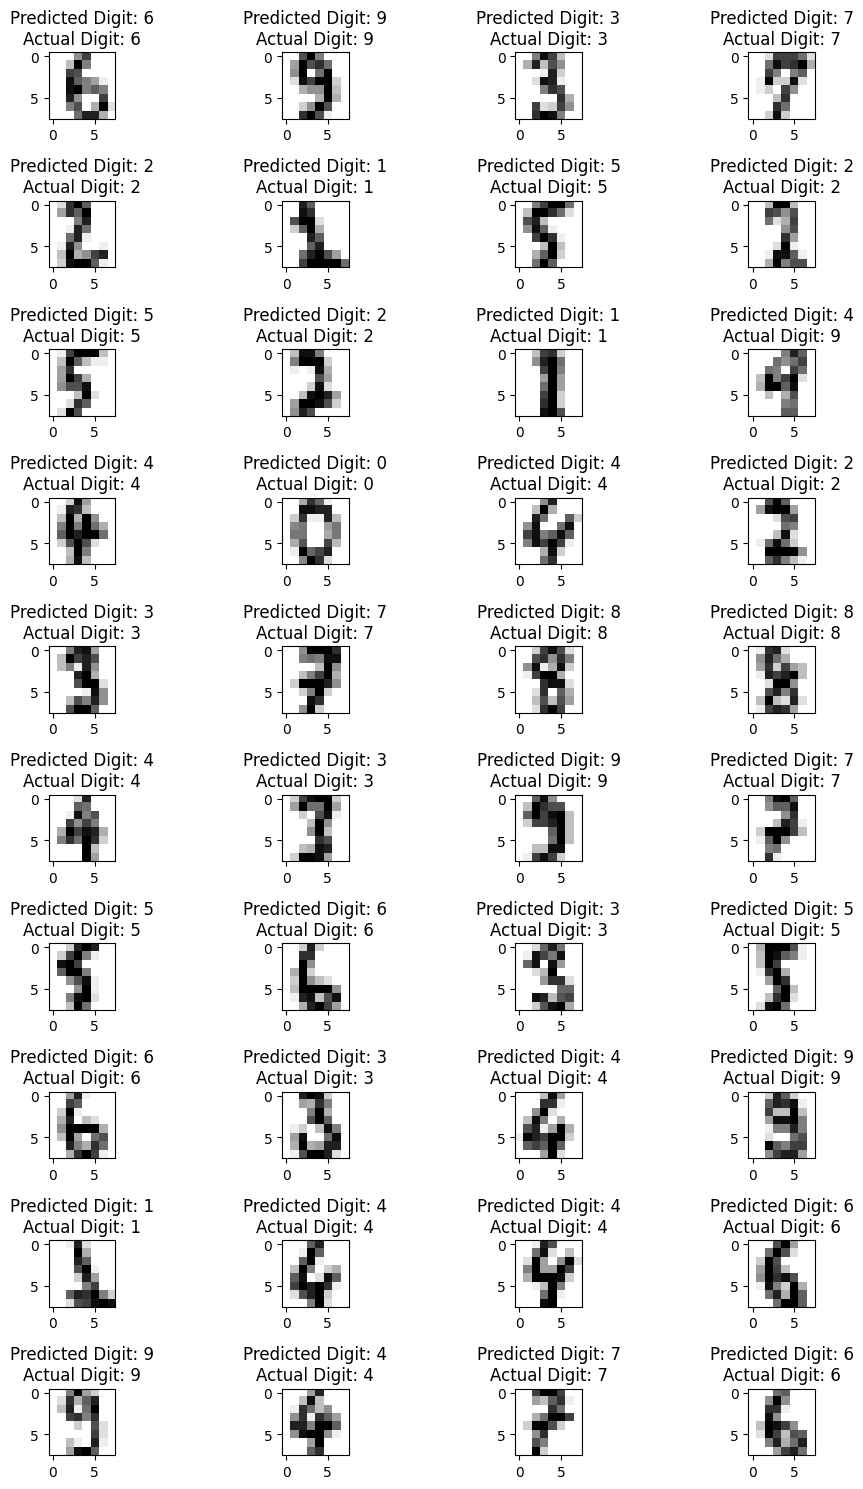

In [25]:
images, one_hot_labels = test_dataset[:40]
actual_labels = one_hot_labels.argmax(axis=1)
predicted_labels = digit_classifier_NN(images).argmax(axis=1)

fig, ax = plt.subplots(10, 4, figsize=(10, 15))

for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(images[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Predicted Digit: {predicted_labels[i]}\nActual Digit: {actual_labels[i]}')
    
fig.tight_layout()
plt.savefig('../../visualization/predictions.png')
plt.show()